In [245]:
import pandas as pd
import numpy as np
from ofxparse import OfxParser
import matplotlib.pyplot as plt
import os
from ast import literal_eval
from datetime import datetime

# load in the data
df = pd.read_pickle("transactions.pkl")
df = df[df.description!="xxx"]

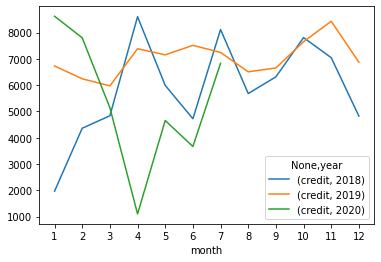

In [253]:
# transactions by month
dff = df[~(df.credit == 0)][['date', 'year', 'month', 'credit']]
monthly_transactions = dff.groupby(['month', 'year']).sum().unstack().plot()
plt.savefig("figures/sum_trans_by_month.png")
plt.xticks([i for i in range(1, 13)])
plt.show()

In [247]:
# transactions by days
plt.figure(figsize=(14,8))
dff = df[~(df.credit == 0) & (df.year==2019)][['date', 'year', 'day', 'month', 'credit']]
daily_transactions = dff.groupby(['day', 'year']).sum().unstack()
daily_transactions
# daily_transactions.plot()
# plt.xticks([i for i in range(1, 31)])
# plt.show()

,month,credit
year,2019,2019
day,,
1,77,2786.50
2,78,3326.50
3,78,3350.50
4,78,3061.50
5,78,2174.00
6,71,2210.00
7,81,2793.00
8,78,2734.50


<Figure size 1008x576 with 0 Axes>

In [248]:
temp = df.drop(df[df.credit == 3000].index, axis=0)
print(temp[(temp.month == 7) & (temp.year == 2020)].sum()['credit'])
print(df[(df.month == 7) & (df.year == 2020)].sum()['credit'])

3832.5
6832.5


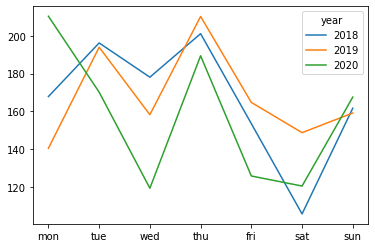

In [254]:
# transactions by weekdays
x = df.groupby(['weekdays', 'year'])['credit'].mean().unstack()
x.index = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
x.plot()
plt.savefig("figures/avg_transaction_by_day.png")
plt.show()